# Project 2 - Educational system data

## Scenario

You are a Data Scientist in an EdTech startup called academy, which offers online training content for a high school and university-level audience.

Mark, your manager, has invited you to a meeting to present the company's international expansion project. He entrusts you with a first exploratory analysis mission to determine whether data on education from the World Bank can inform the expansion project.

Here are the different questions that Mark would like to explore, which you noted during the meeting:

• Which countries have strong potential for our services?

• For each of these countries, what will be the evolution of this potential client base?

• In which countries should the company operate as a priority?

Your mission:

Mark has asked you to conduct a pre-exploratory analysis of this dataset. He sent you this email after the meeting:

Hello,

World Bank data is available at the following address:

https://datacatalog.worldbank.org/dataset/education-statistics

Or for direct download at this link.

I'll let you look at the homepage that describes the dataset. In summary, the World Bank's "EdStats All Indicator Query" lists 4,000 international indicators describing access to education, degree attainment, and information on teachers, education-related expenses, etc. You will find more information on this site:

http://datatopics.worldbank.org/education/

For the pre-analysis, could you:

• Validate the quality of this dataset (does it contain a lot of missing or duplicated data?)

• Describe the information contained in the dataset (number of columns? number of rows?)

• Select the information that seems relevant to answer the problem (which columns contain information that can be useful to answer the company's problem?)

• Determine orders of magnitude of classical statistical indicators for different geographic regions and countries of the world (average/median/standard deviation by country and by continent or geographic block)

Your work will allow us to determine if this dataset can inform decisions about opening up to new countries. We will share your analysis with the board, so please take care to present it well and illustrate it with relevant and readable graphs!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

print('Setup Completed')

Setup Completed


## I - Import data

### 1- Stats Country

In [2]:
path = "./Projet_Python_Dataset_Edstats_csv/EdStatsCountry.csv"
data_stats_country = pd.read_csv(path, index_col='CountryCode')

This dataset **data_stats_country** describes the economies of 214 countries(rows) around the world. There are 32 features(columns), including the one used as index, to describe those countries. 

In [3]:
data_stats_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, ABW to ZWE
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Short Name                                         241 non-null    object 
 1   Table Name                                         241 non-null    object 
 2   Long Name                                          241 non-null    object 
 3   2-alpha code                                       238 non-null    object 
 4   Currency Unit                                      215 non-null    object 
 5   Special Notes                                      145 non-null    object 
 6   Region                                             214 non-null    object 
 7   Income Group                                       214 non-null    object 
 8   WB-2 code                                          240 non-null    object 
 9   National acco

In [4]:
data_stats_country.head()

,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
CountryCode,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### 2 - Stats Countries - Series 

This dataset **data_stats_country_series** describes the indicators used in this dataset. There are 2 features columns, the indicator code and it's description. 

In [5]:
path = "./Projet_Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv"
data_stats_country_series = pd.read_csv(path, index_col='CountryCode')

In [6]:
data_stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, ABW to ZWE
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesCode   613 non-null    object 
 1   DESCRIPTION  613 non-null    object 
 2   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 19.2+ KB


In [7]:
data_stats_country_series.head()

,SeriesCode,DESCRIPTION,Unnamed: 3
CountryCode,,,
ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [8]:
# let's eliminate the duplicated entries
data_stats_country_series[~data_stats_country_series.duplicated()]

,SeriesCode,DESCRIPTION,Unnamed: 3
CountryCode,,,
ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
AFG,NY.GDP.MKTP.PP.KD,Estimates are based on regression.,NaN
AFG,NY.GNP.MKTP.PP.CD,Estimates are based on regression.,NaN
...,...,...,...
VNM,SP.POP.TOTL,Data sources : General Statistics Office of Vi...,NaN
XKX,SP.POP.TOTL,Data sources : World Bank's Kosovo coutnry off...,NaN
XKX,SP.POP.GROW,Data sources: World Bank's Kosovo coutnry offi...,NaN


### 3 - Stats data

This table is the main table of the dataset

In [9]:
path = "./Projet_Python_Dataset_Edstats_csv/EdStatsData.csv"
data_stats = pd.read_csv(path, index_col='Country Name')

In [10]:
data_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886930 entries, Arab World to Zimbabwe
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    886930 non-null  object 
 1   Indicator Name  886930 non-null  object 
 2   Indicator Code  886930 non-null  object 
 3   1970            72288 non-null   float64
 4   1971            35537 non-null   float64
 5   1972            35619 non-null   float64
 6   1973            35545 non-null   float64
 7   1974            35730 non-null   float64
 8   1975            87306 non-null   float64
 9   1976            37483 non-null   float64
 10  1977            37574 non-null   float64
 11  1978            37576 non-null   float64
 12  1979            36809 non-null   float64
 13  1980            89122 non-null   float64
 14  1981            38777 non-null   float64
 15  1982            37511 non-null   float64
 16  1983            38460 non-null   float64
 17  1984

In order to visualize the missing values, I display the histogram below. the rate of missing values is the ratio of missing values per feature, and the frequency is the number of features having a given missing value rate.
For exemple : the majority of features has around of 20% of data.

Text(0, 0.5, 'frequency')

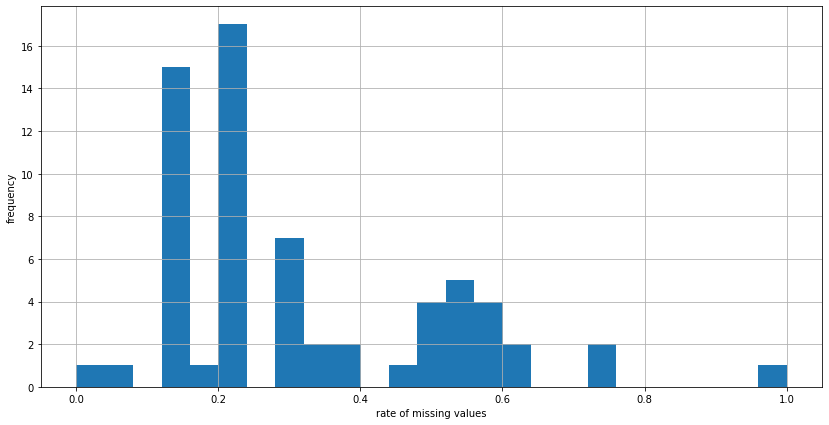

In [11]:
fig = plt.figure(figsize=(14,7))
missing_rate = data_stats.iloc[:,3:68].count()/max(data_stats.iloc[:,3:68].count())
missing_rate.hist(bins=25)
plt.xlabel('rate of missing values')
plt.ylabel('frequency')
#100*sum(data_stats.iloc[:,3:68].count())/(886930*65)

In [12]:
data_stats.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [13]:
data_stats.head()

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ### High quality indicators

A high quality indicator is an indicator without any missing value between 1970 and 2010.

In [14]:
%%time
'''
this function detect the rows containing at lease one True (True means that a value is missed)
True --> NULL
'''
def or_row(row):
    if (row.sum()<1):
        return False
    else:
        return True
    
#data_stats    
missing = data_stats.iloc[:,:43].isnull().apply(or_row, axis=1)

Wall time: 31.3 s


In [15]:
# I use the serie "missing" to create the dataframe "data_stats_wo_missing_val"
data_stats_wo_missing_val = data_stats[missing==False]

In [16]:
data_stats_wo_missing_val['Indicator Name'].value_counts()

Population, total                                                                           235
Population growth (annual %)                                                                234
Population, male (% of total)                                                               217
Population, ages 15-64 (% of total)                                                         217
Population, ages 0-14 (% of total)                                                          217
                                                                                           ... 
Lower secondary completion rate, female (%)                                                   1
Enrolment in tertiary education per 100,000 inhabitants, female                               1
Percentage of repeaters in lower secondary general education, all grades, female (%)          1
Percentage of female students enrolled in primary education who are over-age, female (%)      1
Lower secondary completion rate, male (%

In [17]:
# I export the list of the those indicators into the file 'Indicator names.txt'
nbr_mini = 100
data_stats_wo_missing_val['Indicator Name'].value_counts().index
f = open('Indicator names.txt', 'w')
for line, nbr in zip(data_stats_wo_missing_val['Indicator Name'].value_counts().index,\
                     data_stats_wo_missing_val['Indicator Name'].value_counts()):
    if(nbr > nbr_mini):
        f.writelines(line + ' --> ' + str(nbr) + '\n')
f.close()

### Display Population

In [18]:
Indicator_Name = data_stats_wo_missing_val['Indicator Name']
data_to_display= data_stats_wo_missing_val[Indicator_Name=='Population, total'].iloc[:,:44]

In [19]:
# let's transpose this matrix and keep only numerical values till 2010
data_to_display_mod = pd.DataFrame(index=data_to_display.columns[3:])
columns=[]
for row_nbr in range(len(data_to_display)):
    col_name=data_to_display.index[row_nbr]
    columns.append(col_name)
    data_to_display_mod[col_name] = data_to_display.loc[col_name].iloc[3:].copy().astype('float64')
    data_to_display_mod[col_name] = data_to_display_mod[col_name]/1e6 # in millions


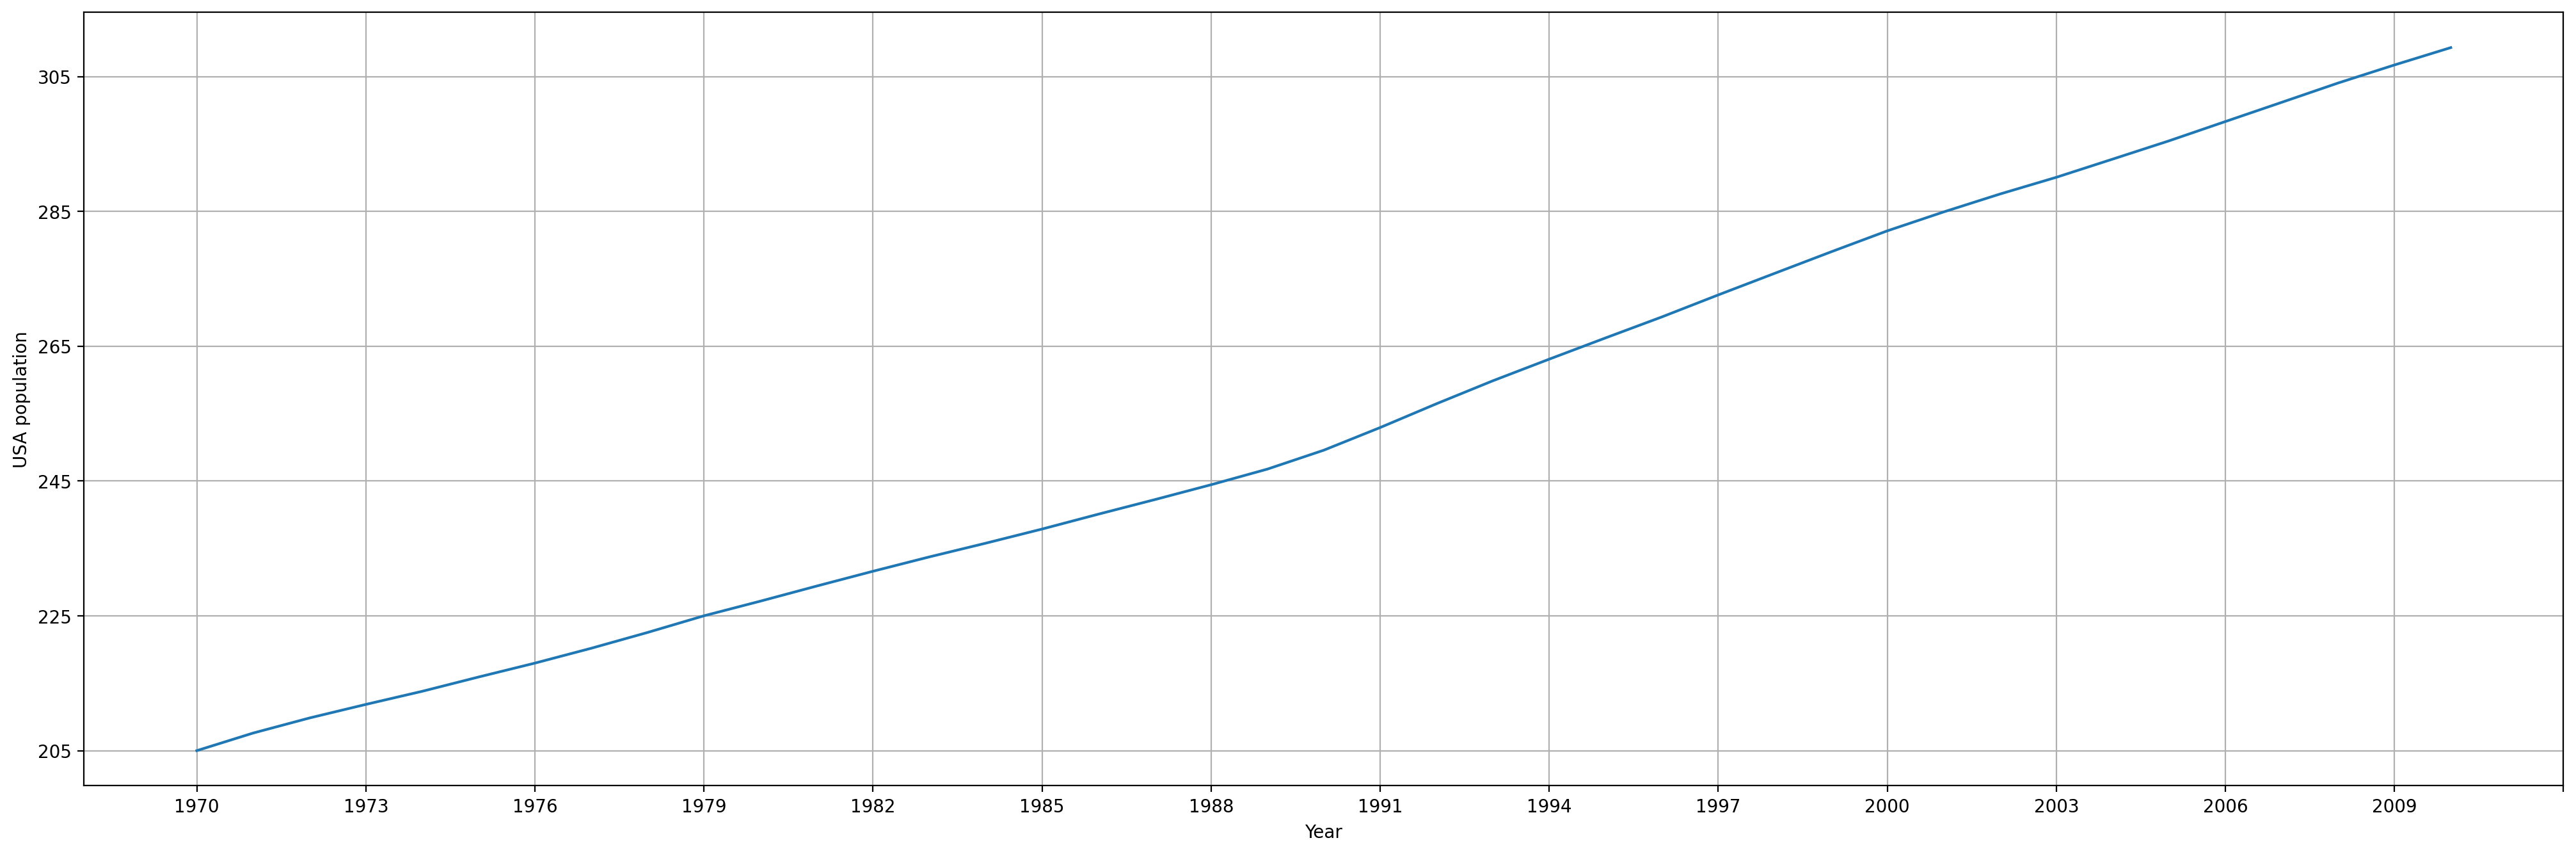

In [68]:
area = 'United States'
plt.figure(figsize=(25, 8), dpi=200)
plt.locator_params(axis="x", nbins=10)
plt.grid()

sns.lineplot(data= data_to_display_mod, x=data_to_display_mod.index, 
                                        y=data_to_display_mod[area])

step = int((max(data_to_display_mod[area])-min(data_to_display_mod[area]))/5)
plt.xticks(np.arange(0,45,3))
plt.yticks(np.arange(min(data_to_display_mod[area]), max(data_to_display_mod[area])+10, step))
plt.xlabel('Year')
plt.ylabel('USA population')
plt.show()

### Function display indicator

In [77]:
# to use this function we need to have a data_stats without any missing value, an indicator name and the area
def DisplayIndicator(data, indicator_name, area):
    #we get the data relative to the choisen indicator
    Indicator_Names = data['Indicator Name']
    data_to_display= data[Indicator_Name==indicator_name].iloc[:,:44]
    
    # We transpose this matrix and keep only numerical values till 2010
    data_to_display_mod = pd.DataFrame(index=data_to_display.columns[3:])
    for row_nbr in range(len(data_to_display)):
        col_name=data_to_display.index[row_nbr]
        data_to_display_mod[col_name] = data_to_display.loc[col_name].iloc[3:].copy().astype('float64')
        data_to_display_mod[col_name] = data_to_display_mod[col_name]/1e3 # in thousands
    #display data_to_display_mod
    plt.figure(figsize=(25, 8), dpi=200)
    plt.locator_params(axis="x", nbins=10)
    plt.grid()

    sns.lineplot(data= data_to_display_mod, x=data_to_display_mod.index, 
                                            y=data_to_display_mod[area])

    step = int((max(data_to_display_mod[area])-min(data_to_display_mod[area]))/5)
    if (step==0): # to avoid the division by zero
        step=1
    plt.xticks(np.arange(0,45,3))
    plt.yticks(np.arange(min(data_to_display_mod[area]), 1.1*max(data_to_display_mod[area]), step))
    plt.xlabel('Year')
    plt.ylabel(indicator_name + " -- " + area)
    plt.show()
    

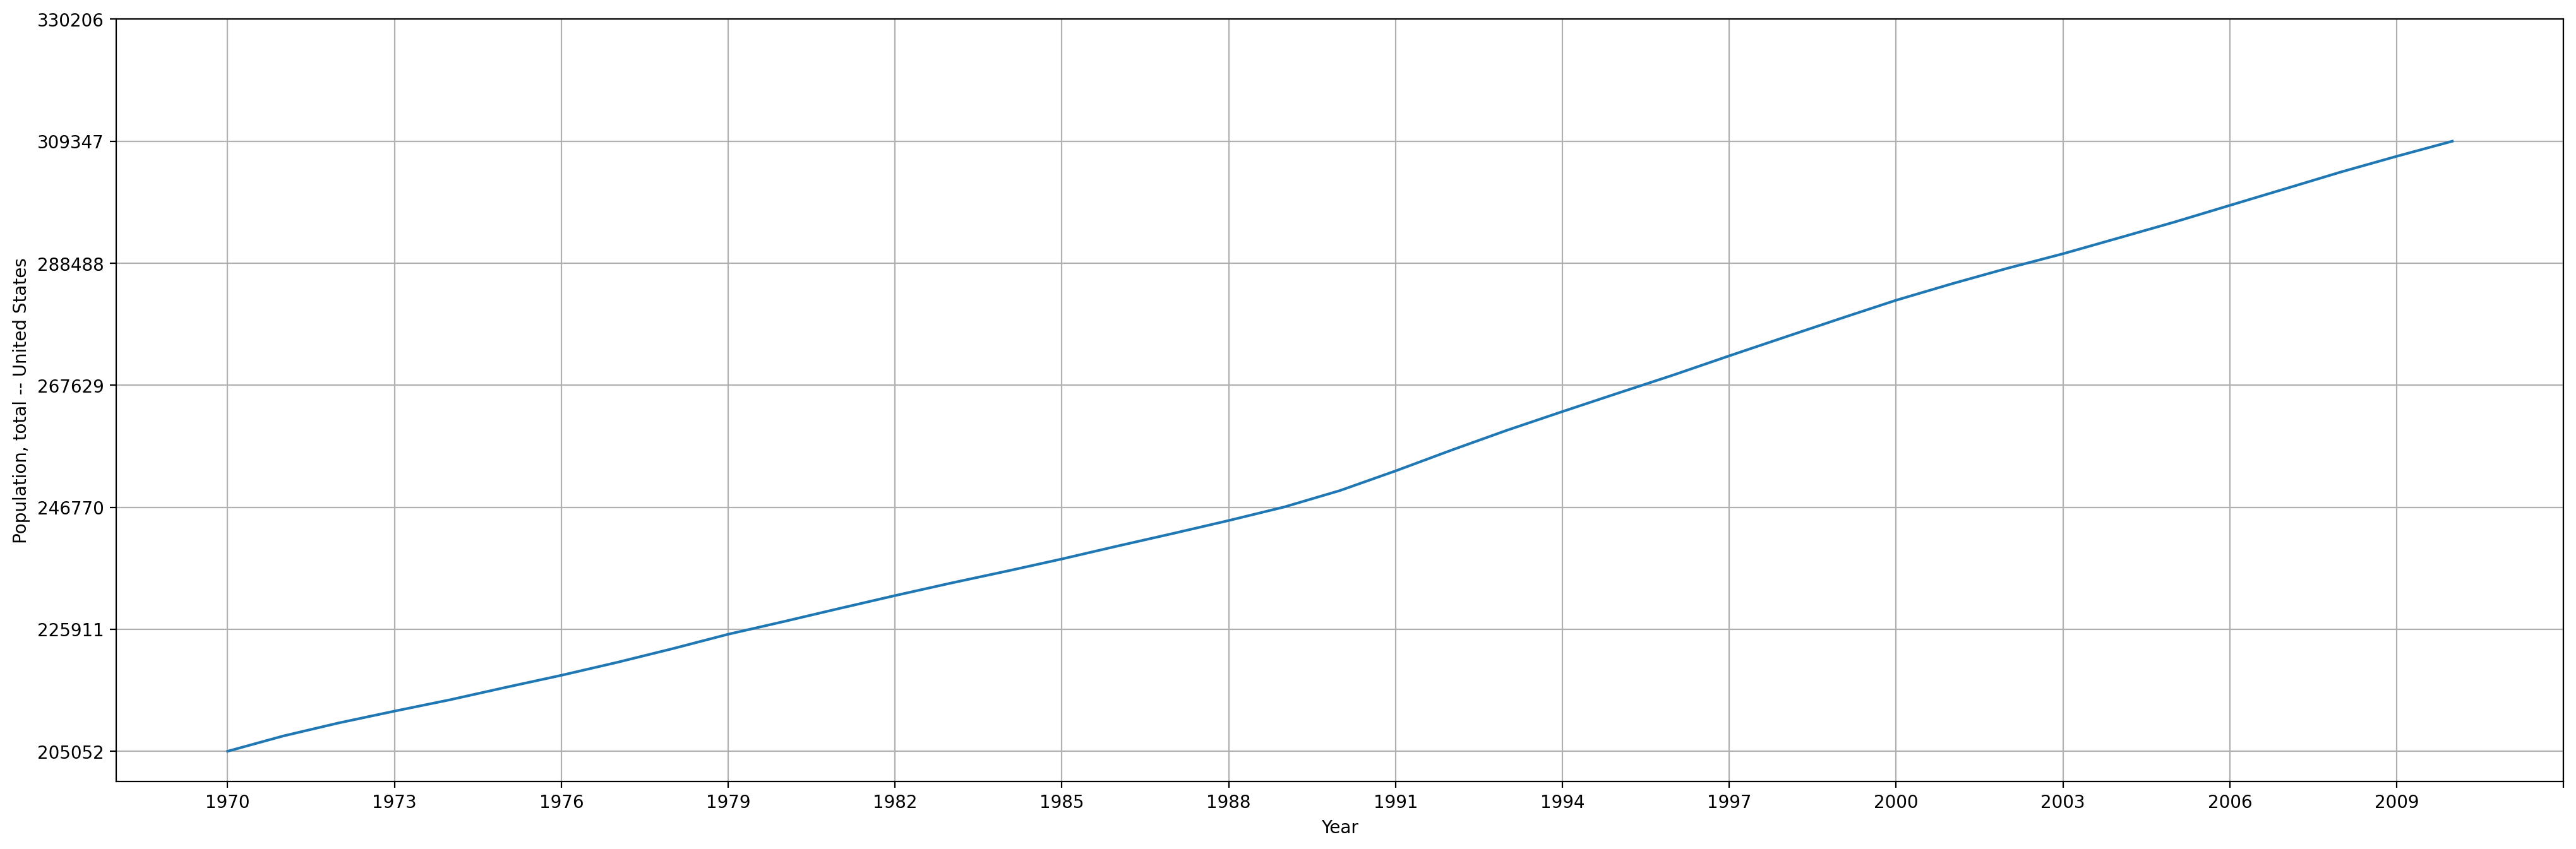

In [78]:
DisplayIndicator(data_stats_wo_missing_val, 
                 'Population, total', 
                 'United States')

### Population of the official age for upper secondary education, both sexes (number)

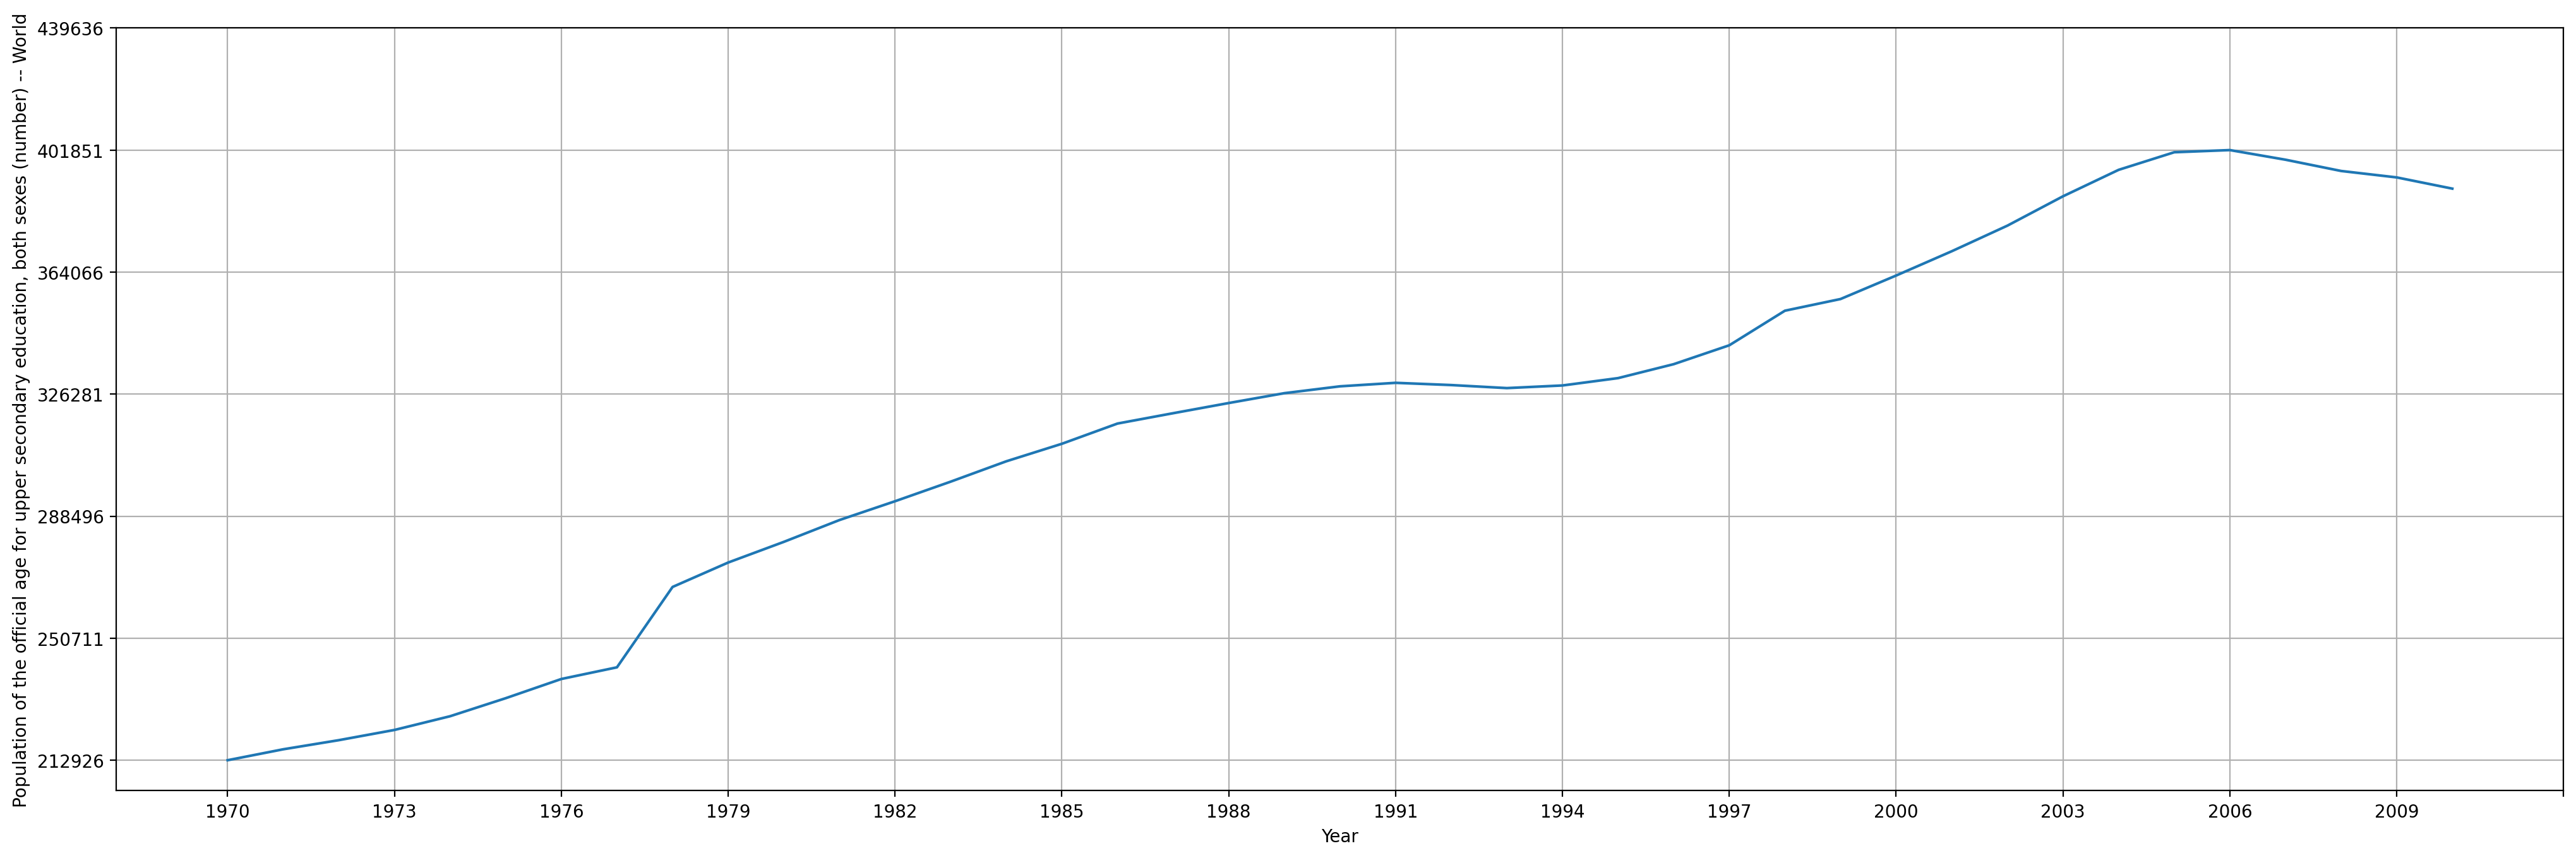

In [79]:
country='World'
indicator = 'Population of the official age for upper secondary education, both sexes (number)'

DisplayIndicator(data_stats_wo_missing_val, 
                 indicator, 
                 country)

In [23]:
data_tmp = data_stats_wo_missing_val.loc[country]
data_tmp[data_tmp['Indicator Name'] == indicator].iloc[:,:44]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Name,,,,,,,,,,,,,,,,,,,,,
World,WLD,Population of the official age for upper secon...,SP.SEC.UTOT.IN,212926496.0,216312592.0,219136272.0,222300576.0,226547408.0,232131760.0,238077584.0,...,370529632.0,378452096.0,387544224.0,395731648.0,401178912.0,401853440.0,398870144.0,395384288.0,393389760.0,389916160.0


### Population of the official age for tertiary education, both sexes (number)

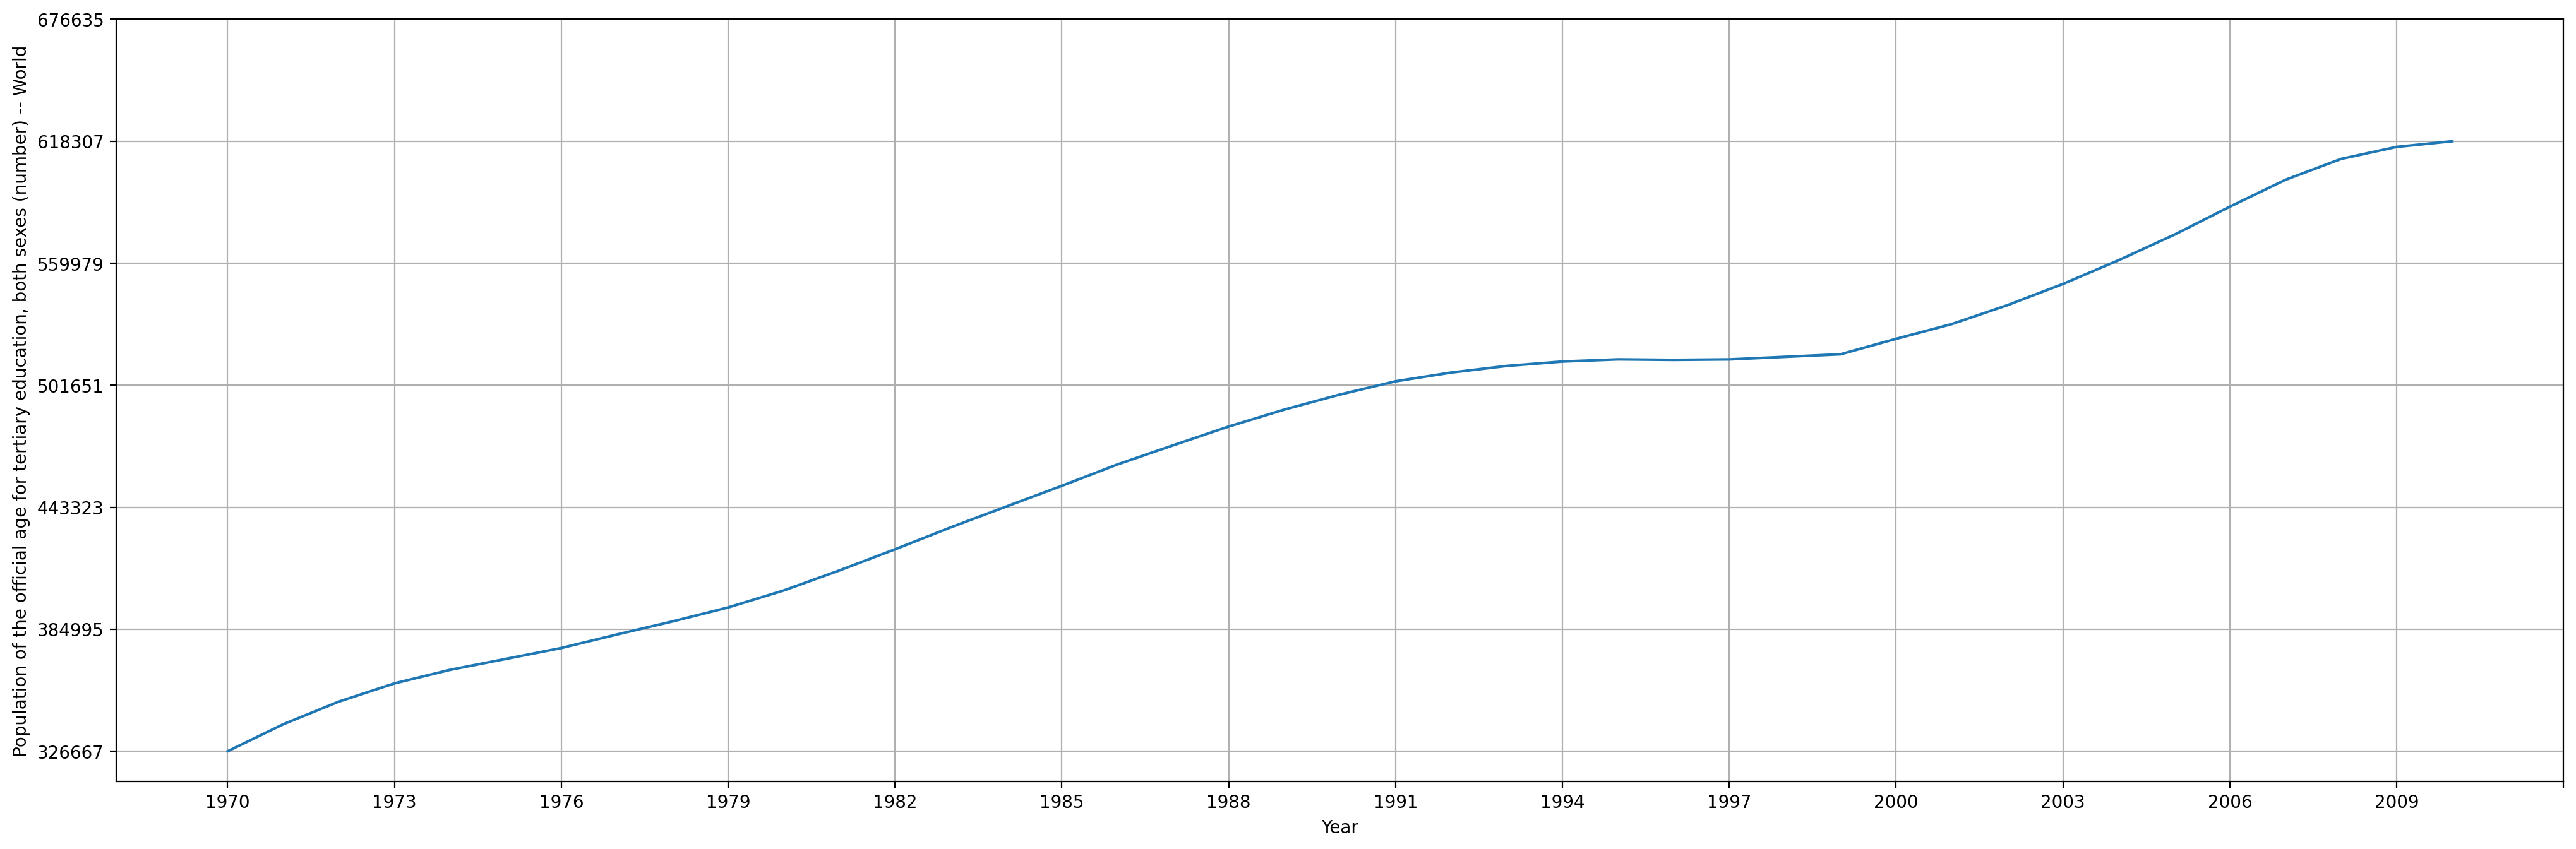

In [80]:
indicator = 'Population of the official age for tertiary education, both sexes (number)'

DisplayIndicator(data_stats_wo_missing_val, 
                 indicator, 
                 country)

In [25]:

data_tmp = data_stats_wo_missing_val.loc[country]
data_tmp[data_tmp['Indicator Name'] == indicator].iloc[:,:44]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Name,,,,,,,,,,,,,,,,,,,,,
World,WLD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,326666752.0,339567808.0,350388064.0,359108576.0,365583168.0,370793152.0,376018240.0,...,530896160.0,539917760.0,550078720.0,561416640.0,573594624.0,587026624.0,599859264.0,609842496.0,615595648.0,618308800.0


### Enrolment in tertiary education, all programmes, both sexes (number)

In [26]:
indicator = 'Enrolment in tertiary education, all programmes, both sexes (number)'
data_stats_wo_missing_val[data_stats_wo_missing_val['Indicator Name']==indicator].index

Index(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification', 'Low & middle income',
       'Low income', 'Lower middle income', 'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)', 'Middle income',
       'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)', 'Upper middle income',
       'World', 'Australia', 'Malta', 'Mongolia', 'New Zealand',
       'Russian Federation'],
      dtype='object', name='Country Name')

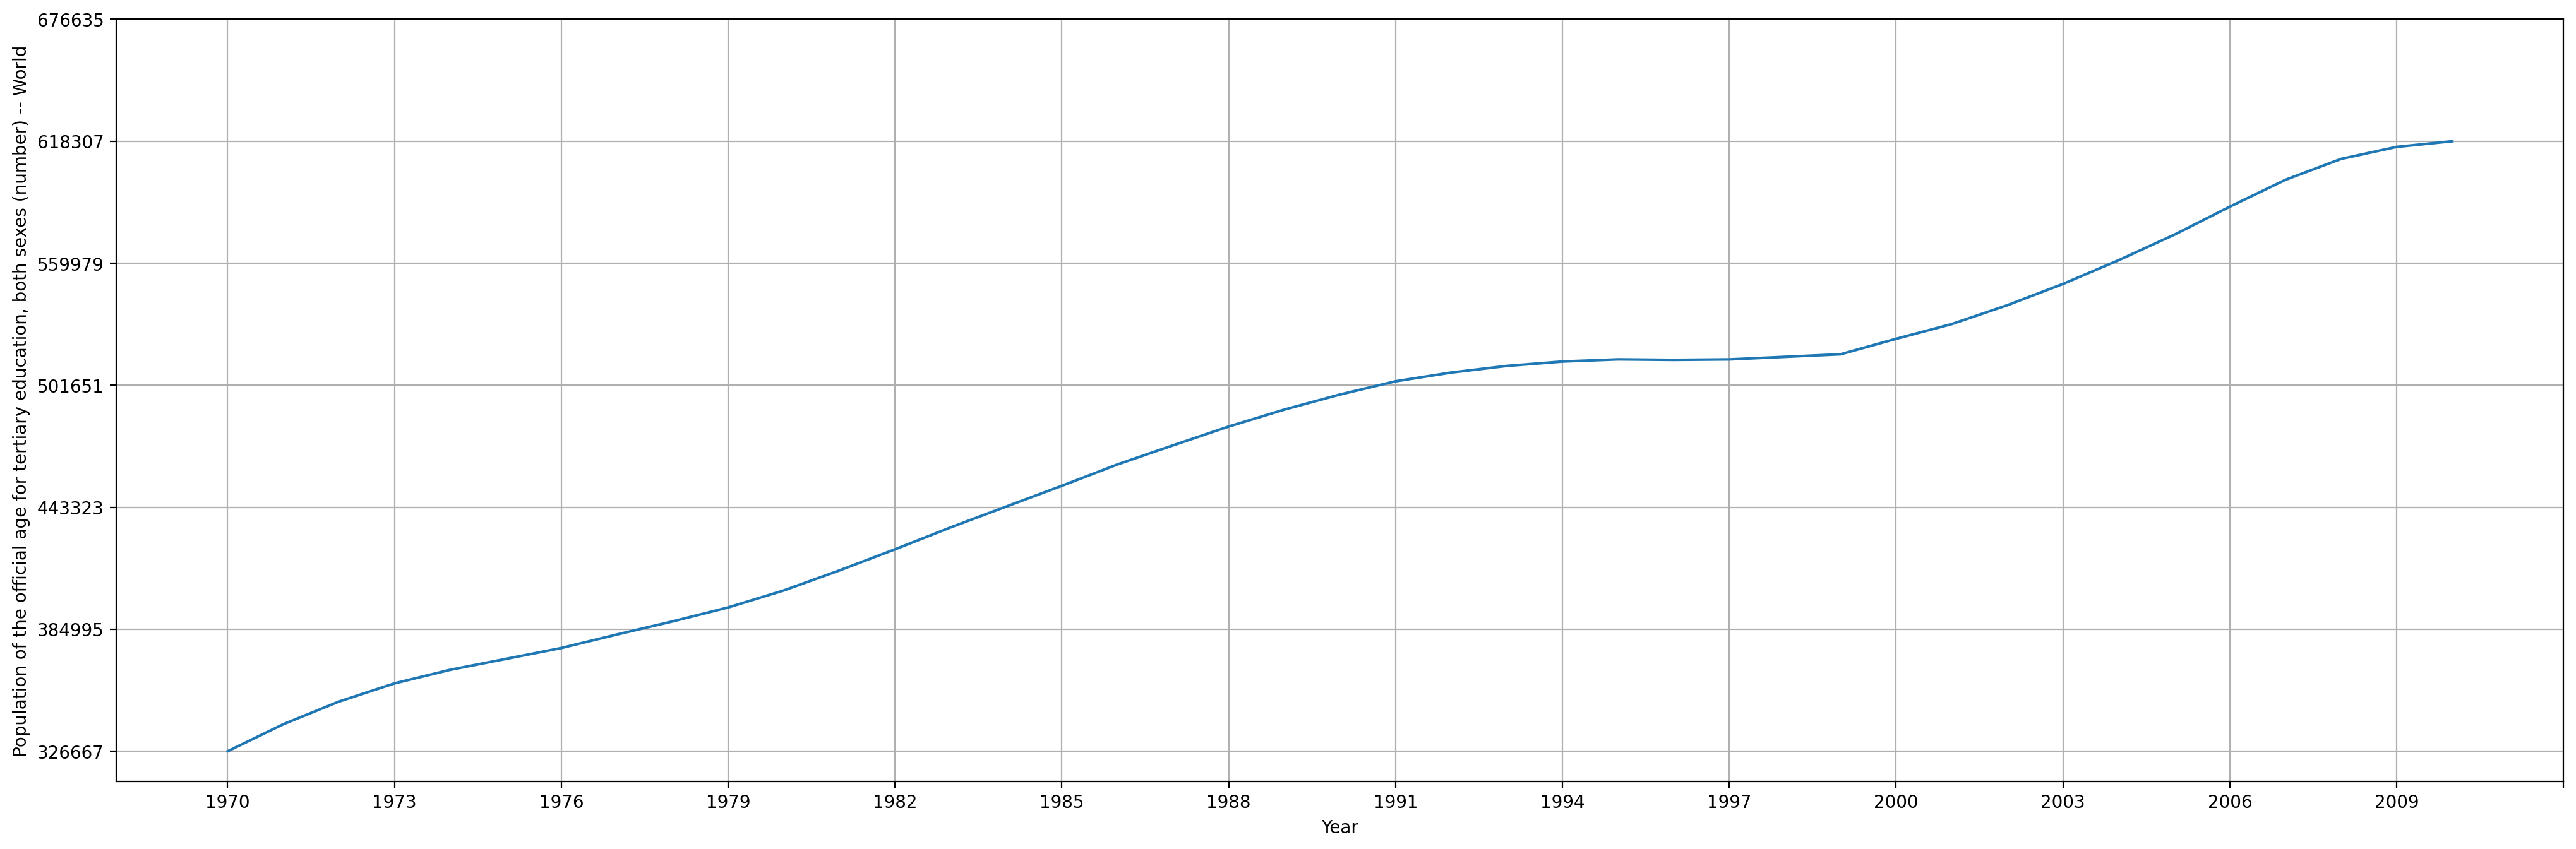

In [81]:
DisplayIndicator(data_stats_wo_missing_val, 
                 indicator, 
                 country)

In [28]:
data_tmp = data_stats_wo_missing_val.loc[country]
data_tmp[data_tmp['Indicator Name'] == indicator].iloc[:,:44]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Name,,,,,,,,,,,,,,,,,,,,,
World,WLD,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,32985200.0,33845156.0,35613220.0,37318712.0,39182280.0,41537384.0,44033492.0,...,106713888.0,116801632.0,125312912.0,132433952.0,139271328.0,146924896.0,155276992.0,164139360.0,172163056.0,181424688.0


### Ordering by Population 2010

#### 1- Total population

In [29]:
indicator = 'Population, total'
file_name = 'Total population.txt'
data_tmp = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==indicator]['2010'].sort_values(ascending=False)

f = open(file_name, 'w')
for index, population in zip(data_tmp.index, data_tmp):
    CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
    if(len(CountryCurrency)>0):
        if(~CountryCurrency.isnull().iloc[0]):
            f.writelines(index + ' ---> ' +str(population) + '\n')    
f.close()

In [30]:
#len(data_stats_country[data_stats_country['Short Name']=="East Asia & Pacific"])

#### 2- Upper secondary population

In [31]:
indicator = 'Population of the official age for upper secondary education, both sexes (number)'
file_name = 'Upper secondary population.txt'
data_tmp = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==indicator]['2010'].sort_values(ascending=False)

f = open(file_name, 'w')
for index, population in zip(data_tmp.index, data_tmp):
    CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
    if(len(CountryCurrency)>0):
        if(~CountryCurrency.isnull().iloc[0]):
            f.writelines(index + ' ---> ' +str(population) + '\n')     
f.close()

#### 3-Upper secondary population(changer le titre)

In [32]:

upper_secondary = 'Population of the official age for upper secondary education, both sexes (number)'
tertiary        = 'Population of the official age for tertiary education, both sexes (number)'
file_name = 'Total potential client.txt'

data_upper_secondary = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==upper_secondary]['2010'].sort_values(ascending=False)
data_tertiary        = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==tertiary]['2010'].sort_values(ascending=False)

total_potential_client = data_upper_secondary + data_tertiary  

total_potential_client = total_potential_client.sort_values(ascending=False)
L=[]
f = open(file_name, 'w')
for index, number in zip(total_potential_client.index, total_potential_client):
    CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
    if(len(CountryCurrency)>0):
        if(~CountryCurrency.isnull().iloc[0]):
            f.writelines(index + ' ---> ' +str(number) + '\n')
            if(not isnan(number)):
                L.append(number)
        
f.close()


In [33]:
total_potential_client = pd.Series(dtype='int64')
for index, number in zip(data_tertiary.index, data_tertiary):
        total_potential_client[index] = number + data_upper_secondary[index]

f = open(file_name, 'w')
for index, number in zip(data_tertiary.index, data_tertiary):
    CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
    number += data_upper_secondary[index]
    if(len(CountryCurrency)>0):
        if(~CountryCurrency.isnull().iloc[0]):
            f.writelines(index + ' ---> ' +str(number) + '\n')
            
f.close()

#### 4-Population growth

In [34]:
indicator = 'Population growth (annual %)'
file_name = 'Population growth.txt'
data_tmp = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==indicator]['2010'].sort_values(ascending=False)

f = open(file_name, 'w')
for index, population in zip(data_tmp.index, data_tmp):
    CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
    if(len(CountryCurrency)>0):
        if(~CountryCurrency.isnull().iloc[0]):
            f.writelines(index + ' ---> ' +str(population) + '\n')       
f.close()

#### 5-Tertiary

In [35]:
indicator = 'Enrolment in tertiary education, all programmes, both sexes (number)'
file_name = 'Tertiary.txt'
data_tmp = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==indicator]['2010'].sort_values(ascending=False)

f = open(file_name, 'w')
for index, number in zip(data_tmp.index, data_tmp):
    f.writelines(index + ' ---> ' +str(number) + '\n')
f.close()

#### 6-Tertiary ratio

In [36]:
indicator = 'Gross enrolment ratio, tertiary, both sexes (%)'
file_name = 'Tertiary ratio.txt'
data_tmp = data_stats_wo_missing_val[\
        data_stats_wo_missing_val['Indicator Name']==indicator]['2010'].sort_values(ascending=False)

f = open(file_name, 'w')
for index, line in zip(data_tmp.index, data_tmp):
    f.writelines(index + ' ---> ' +str(line) + '\n')
f.close()

In [37]:
data_stats_wo_missing_val[data_stats_wo_missing_val['Indicator Name'] ==\
                          'Theoretical duration of upper secondary education (years)']

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,DZA,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,AND,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,PSE,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",YEM,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The high school is called "Upper secondary", it lasts between 2 and 4 years depending on the country. And the university is called "tertiary education".

### 4 - Stats Foot Note

In [38]:
path = "./Projet_Python_Dataset_Edstats_csv/EdStatsFootNote.csv"
data_stats_foot_note = pd.read_csv(path)

In [39]:
data_stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [40]:
data_stats_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [41]:
data_stats_foot_note.CountryCode.value_counts()

LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: CountryCode, Length: 239, dtype: int64

In [42]:
data_stats_foot_note.groupby(['CountryCode'], ).count().sort_values(by='Year', ascending=False)

,SeriesCode,Year,DESCRIPTION,Unnamed: 4
CountryCode,,,,
LIC,7320,7320,7320,0
CYP,7183,7183,7183,0
LDC,6481,6481,6481,0
SSA,6389,6389,6389,0
SSF,6336,6336,6336,0
...,...,...,...,...
IMN,32,32,32,0
CUW,23,23,23,0
XKX,12,12,12,0


In [43]:
data_stats_foot_note.Year.value_counts

<bound method IndexOpsMixin.value_counts of 0         YR2001
1         YR2005
2         YR2000
3         YR2004
4         YR2006
           ...  
643633    YR2007
643634    YR2014
643635    YR2015
643636    YR2017
643637    YR2017
Name: Year, Length: 643638, dtype: object>

### 5 - Stats Series

In [44]:
path = "./Projet_Python_Dataset_Edstats_csv/EdStatsSeries.csv"
data_stats_series = pd.read_csv(path, index_col='Series Code')

In [45]:
data_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3665 entries, BAR.NOED.1519.FE.ZS to XGDP.56.FSGOV.FDINSTADM.FFD
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Topic                                3665 non-null   object 
 1   Indicator Name                       3665 non-null   object 
 2   Short definition                     2156 non-null   object 
 3   Long definition                      3665 non-null   object 
 4   Unit of measure                      0 non-null      float64
 5   Periodicity                          99 non-null     object 
 6   Base Period                          314 non-null    object 
 7   Other notes                          552 non-null    object 
 8   Aggregation method                   47 non-null     object 
 9   Limitations and exceptions           14 non-null     object 
 10  Notes from original source           0 non-null      float64

In [46]:
data_stats_series.head()

,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
Series Code,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_stats_series.Topic.value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

# MAIN

I am going to create a function called *select_top_countries* that selects the top k-countries base on :
- Population between 15 - 24 years
- GDP per capita
- Growth of the population

Hypothesis : 
- The Growth rate is constant 
- The GDP has the same growth rate as the population

In [53]:
def select_top_countries(k=5, GDP_included=False, Pop_growth_included=False, GDP_growth_included=False, projection=0):
    #k is the number of the top countries to select
    country_rank =0
    upper_secondary = 'Population of the official age for upper secondary education, both sexes (number)'
    tertiary        = 'Population of the official age for tertiary education, both sexes (number)'
    GDP = 'GDP per capita (current US$)'
    Pop_growth = 'Population growth (annual %)'
    
    file_name = 'Total potential client (top k countries).txt'
    
    data_upper_secondary = data_stats_wo_missing_val[\
            data_stats_wo_missing_val['Indicator Name']==upper_secondary]['2010'].sort_values(ascending=False)
    data_tertiary        = data_stats_wo_missing_val[\
            data_stats_wo_missing_val['Indicator Name']==tertiary]['2010'].sort_values(ascending=False)
    data_GDP             = data_stats_wo_missing_val[\
            data_stats_wo_missing_val['Indicator Name']==GDP]['2010'].sort_values(ascending=False)
    data_pop_growth      = data_stats_wo_missing_val[\
            data_stats_wo_missing_val['Indicator Name']==Pop_growth]['2010'].sort_values(ascending=False)
    
    total_potential_client = data_upper_secondary + data_tertiary
    if(GDP_included):
        total_potential_client = total_potential_client*data_GDP/1e9  
    if(Pop_growth_included):
        if(GDP_growth_included):
            Coeffs = (1+1e-2*data_pop_growth)**(2*projection) 
        else:
            Coeffs = (1+1e-2*data_pop_growth)**projection 
        #The GDP has the same growth rate as the population --> (2*projection)
        total_potential_client = total_potential_client.multiply(Coeffs)
        
        
    total_potential_client = total_potential_client.sort_values(ascending=False)
    L=[]
    f = open(file_name, 'w')
    for index, number in zip(total_potential_client.index, total_potential_client):
        CountryCurrency = data_stats_country[data_stats_country['Short Name']==index]["Currency Unit"]
        if(len(CountryCurrency)>0):
            if(~CountryCurrency.isnull().iloc[0]):
                f.writelines(index + ' ---> ' +str(number) + '\n')
                print(index)
                country_rank +=1
                if(not isnan(number)):
                    L.append(number)

        if (country_rank >=k ):
            break
            
    f.close()

# Applications

#### 1 - Population only  

If we take into account only the actual population we get ths following countries :

In [57]:
# choose a k between 1 and 96
select_top_countries(k=10, GDP_included=False, Pop_growth_included=False, GDP_growth_included=False, projection=0)

India
China
United States
Indonesia
Pakistan
Bangladesh
Nigeria
Mexico
Vietnam
Ethiopia


#### 2 - Population in the next 10 years  

If we take into account the future population (the projection in 10 years) we get ths following countries :

In [63]:
# choose a k between 1 and 96
select_top_countries(k=10, GDP_included=False, Pop_growth_included=True, GDP_growth_included=False, projection=10)

India
China
Pakistan
Indonesia
United States
Nigeria
Bangladesh
Mexico
Vietnam
Ethiopia


#### 3 - GDP included  

If we take into account the actual population and the actual GDP we get ths following countries :

In [62]:
# choose a k between 1 and 96
select_top_countries(k=10, GDP_included=True, Pop_growth_included=False, GDP_growth_included=False, projection=0)

United States
China
Japan
Germany
United Kingdom
India
France
Italy
Canada
Mexico


#### 4 - Population & GDP growth  

If we take into account the growth of the population and the GDP. We suppose that the only source of GDP growth is the population. In this case, we get ths following countries :

In [64]:
# choose a k between 1 and 96
select_top_countries(k=10, GDP_included=True, Pop_growth_included=True, GDP_growth_included=True, projection=10)

United States
China
Japan
India
United Kingdom
Germany
France
Canada
Italy
Mexico
